In [63]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import os

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load Dataset

In [65]:
dataset_path = '../../dataset/additional_datasets/'
dataset_name = 'Breast_GSE45827'
dataset_norm_suffix = '_norm'
dataset_pca_suffix = '_pca'

with open('../../preprocessing/class_mapping.pickle', 'rb') as handle:
    class_mapping = pickle.load(handle)

In [66]:
df_norm = pd.read_csv(dataset_path + dataset_name + dataset_norm_suffix + '.csv', index_col=0)
X = df_norm.drop('type', axis=1)
y = df_norm.type

### PCA

In [67]:
PCA_COMPONENTS = 2

def transform_to_PCA(X, y, pca_components=PCA_COMPONENTS):
    pca = PCA(n_components=pca_components)
    pca.fit(X)
    X_pca = pca.transform(X)
    y_pca = y.copy()

    return X_pca, y_pca

In [68]:
X_pca, y_pca = transform_to_PCA(X, y)

### t-SNE

In [69]:
def tsne(X, y):
    tsne = TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(X)
    y_tsne = y.copy()

    return X_tsne, y_tsne

In [70]:
X_tsne, y_tsne = tsne(X, y)

c:\Users\Branko\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Branko\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## K Means

In [71]:
def kmeans(X, ax, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    
    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    ax.set_title(f"n_clusters={n_clusters}")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")

    return kmeans.inertia_, silhouette_score(X, kmeans.labels_)


### PCA

n_clusters=2, inertia=1135027.228422253, silhouette=0.5494144516997556
n_clusters=3, inertia=592106.3776746584, silhouette=0.46004164834663835
n_clusters=4, inertia=403964.8095452811, silhouette=0.44589585931609615
n_clusters=5, inertia=305860.1580918991, silhouette=0.404982012441769
n_clusters=6, inertia=216597.83263850564, silhouette=0.45317391984606736
n_clusters=7, inertia=188058.06575513651, silhouette=0.4223924392432915
n_clusters=8, inertia=166283.81665398262, silhouette=0.3896995679810601
n_clusters=9, inertia=141803.8154032253, silhouette=0.4178651891186171


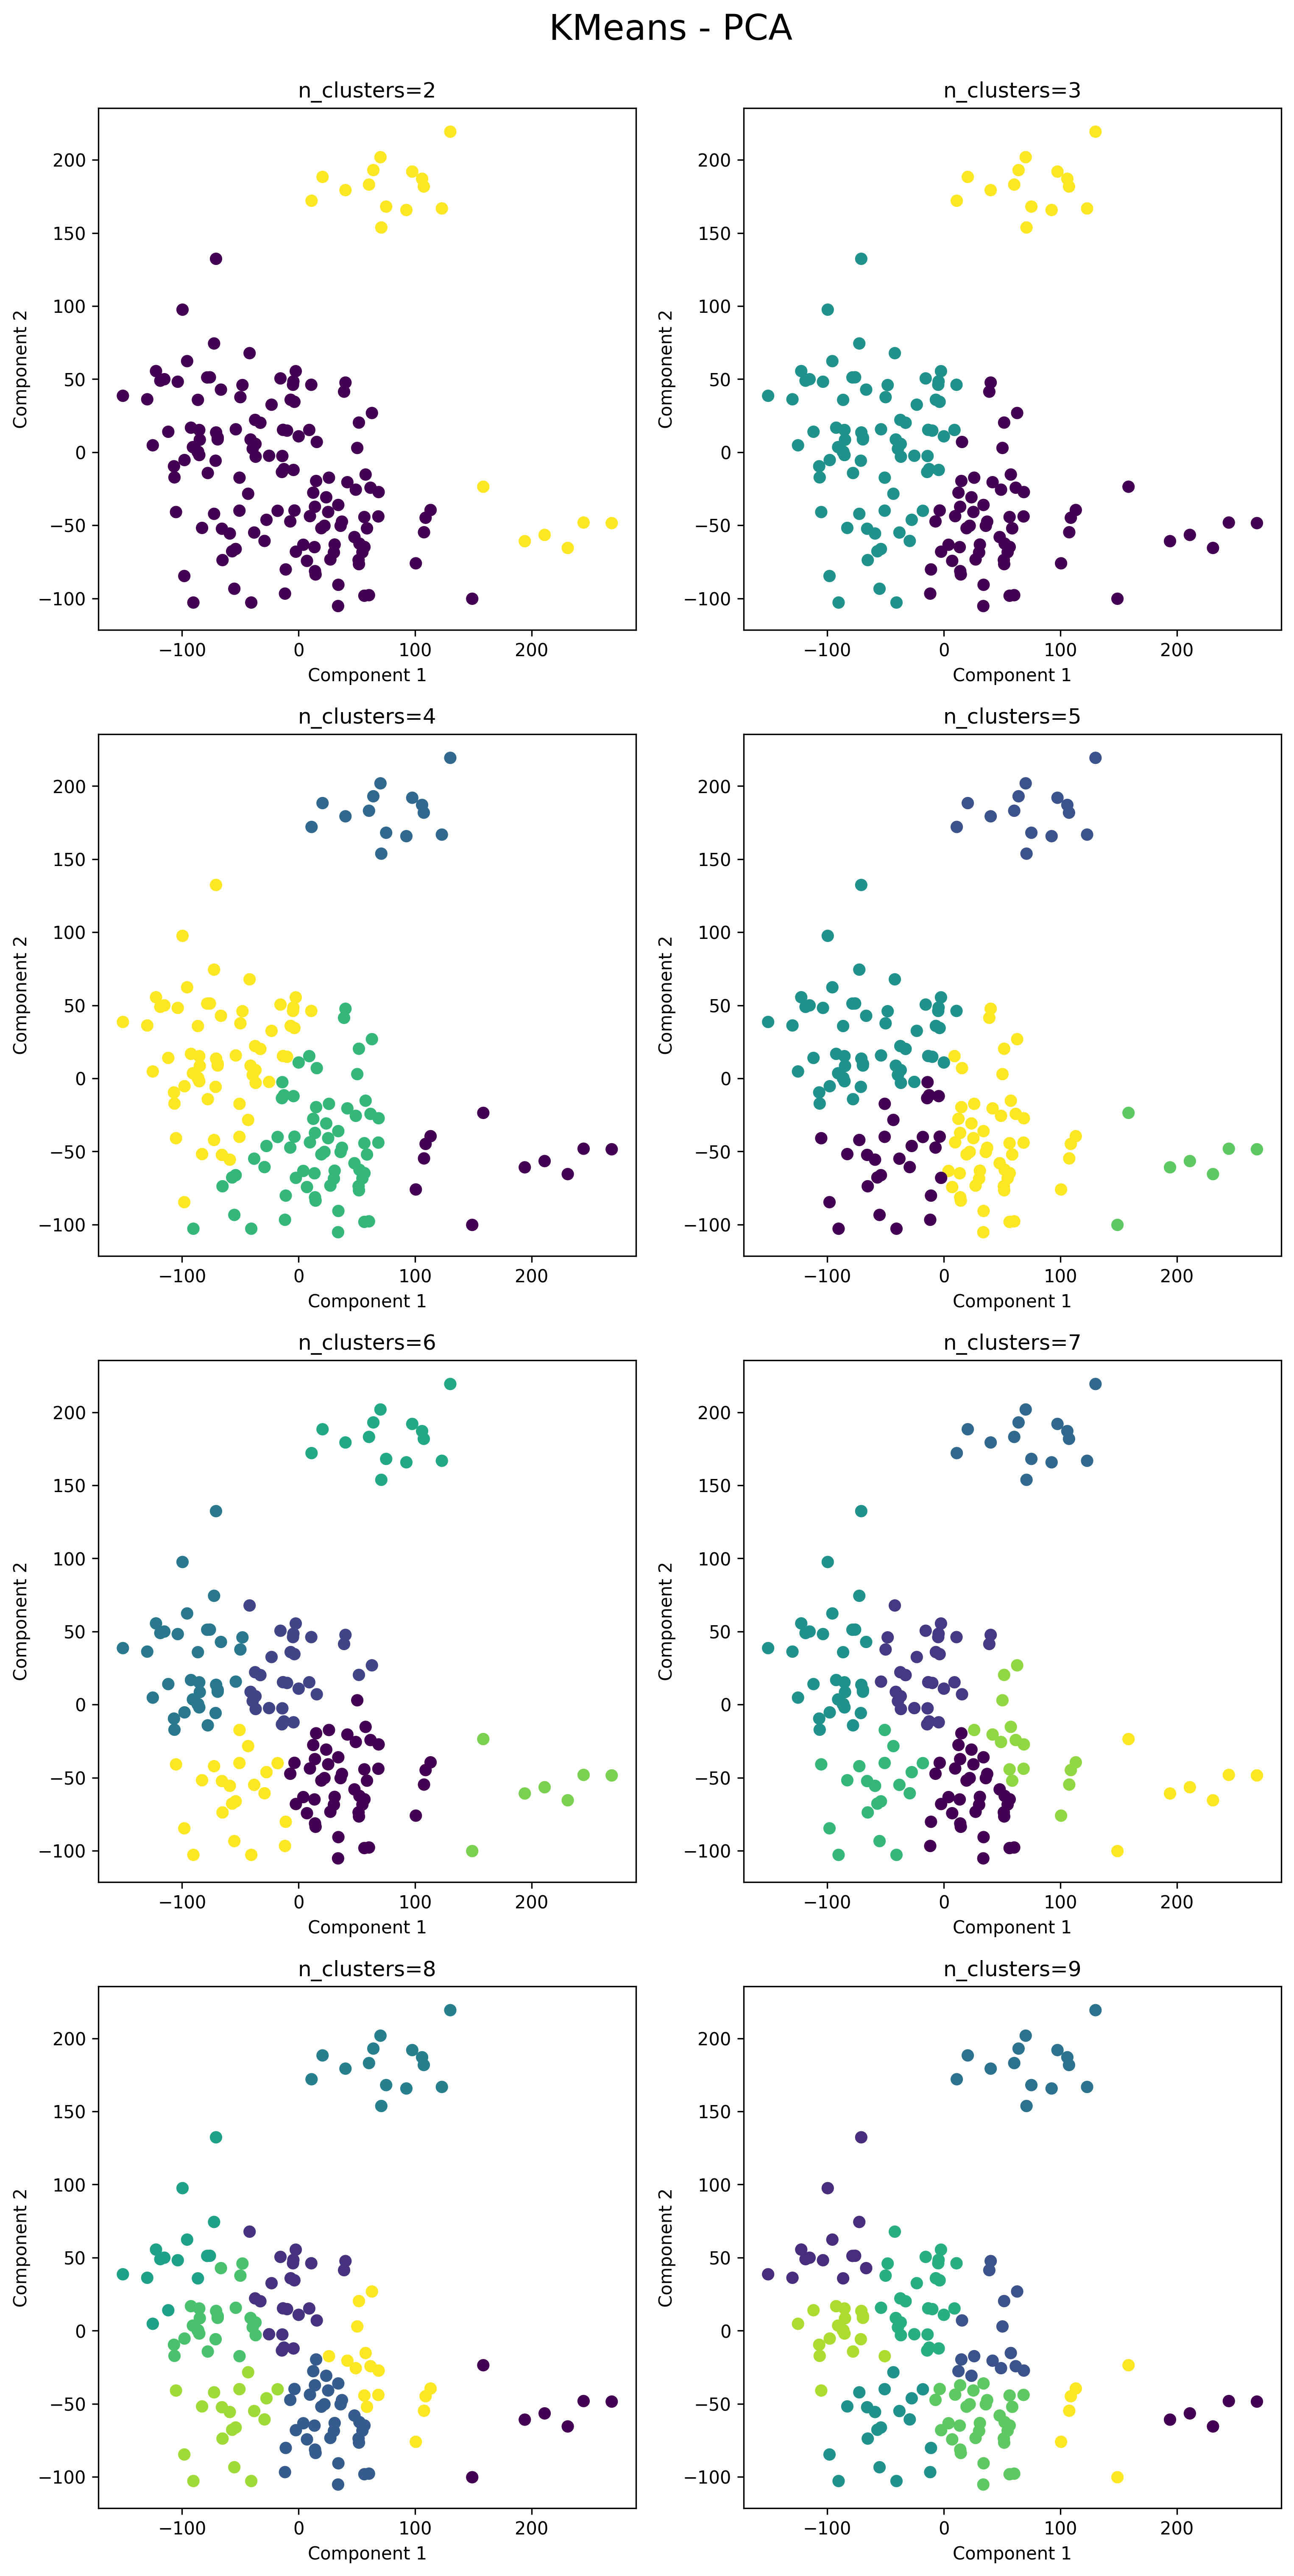

In [72]:
fig, axs = plt.subplots(4, 2, figsize=(12, 25), dpi=300)
plt.suptitle('KMeans - PCA', fontsize=20, y=0.91)

kmeans_info = []

for n_clusters in range(2, 10):
    inertia, silhouette = kmeans(X_pca, axs[(n_clusters - 2) // 2, (n_clusters - 2) % 2], n_clusters=n_clusters)
    print(f"n_clusters={n_clusters}, inertia={inertia}, silhouette={silhouette}")

    kmeans_info.append({
        'n_clusters': n_clusters,
        'inertia': inertia,
        'silhouette': silhouette
    })

# Save figure
if not os.path.exists('../../figures/KMeans'):
    os.mkdir('../../figures/KMeans') 

plt.savefig(f'../../figures/KMeans/KMeans - PCA.png')

plt.show()

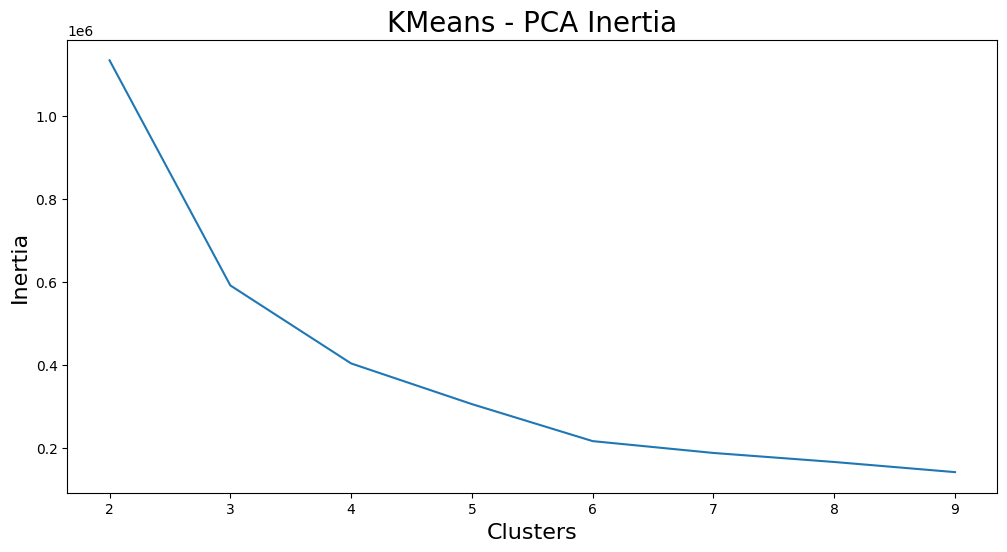

In [73]:
# plot inertia

plt.figure(figsize=(12, 6), dpi=100)
plt.title('KMeans - PCA Inertia', fontsize=20)
plt.xlabel('Clusters', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.plot([x['n_clusters'] for x in kmeans_info], [x['inertia'] for x in kmeans_info])

# Save figure
if not os.path.exists('../../figures/KMeans'):
    os.mkdir('../../figures/KMeans') 

plt.savefig(f'../../figures/KMeans/KMeans - PCA inertia.png')

plt.show()

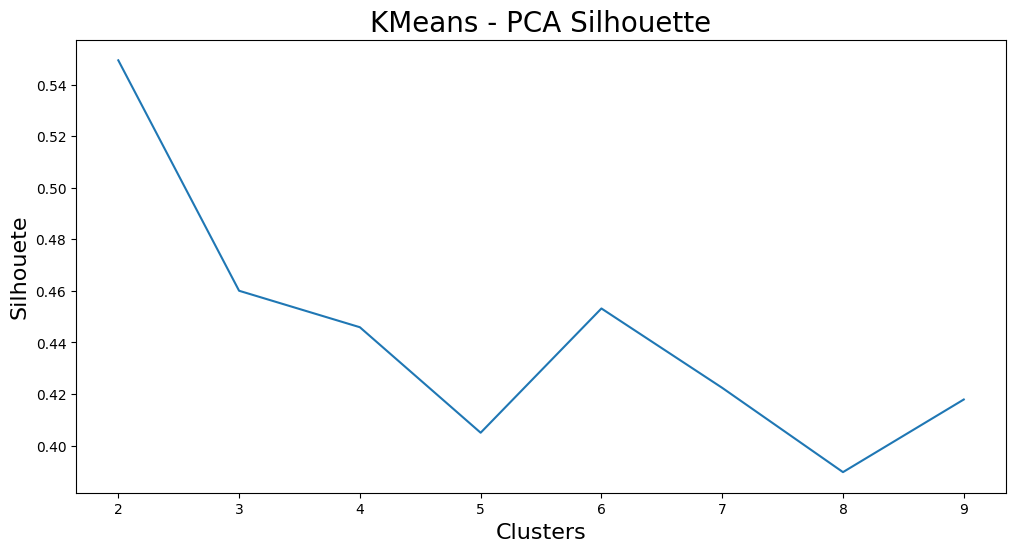

In [74]:
# plot silhouette

plt.figure(figsize=(12, 6), dpi=100)
plt.title('KMeans - PCA Silhouette', fontsize=20)
plt.xlabel('Clusters', fontsize=16)
plt.ylabel('Silhouete', fontsize=16)
plt.plot([x['n_clusters'] for x in kmeans_info], [x['silhouette'] for x in kmeans_info])

# Save figure
if not os.path.exists('../../figures/KMeans'):
    os.mkdir('../../figures/KMeans') 

plt.savefig(f'../../figures/KMeans/KMeans - PCA silhouette.png')

plt.show()

### t-SNE

n_clusters=2, inertia=2540.130859375, silhouette=0.44684383273124695
n_clusters=3, inertia=1644.4178466796875, silhouette=0.43681082129478455
n_clusters=4, inertia=1030.6002197265625, silhouette=0.4952436089515686
n_clusters=5, inertia=714.7178344726562, silhouette=0.4822498857975006
n_clusters=6, inertia=578.4866333007812, silhouette=0.46063101291656494
n_clusters=7, inertia=458.1677551269531, silhouette=0.46594297885894775
n_clusters=8, inertia=381.20758056640625, silhouette=0.46441003680229187
n_clusters=9, inertia=328.53912353515625, silhouette=0.46678197383880615


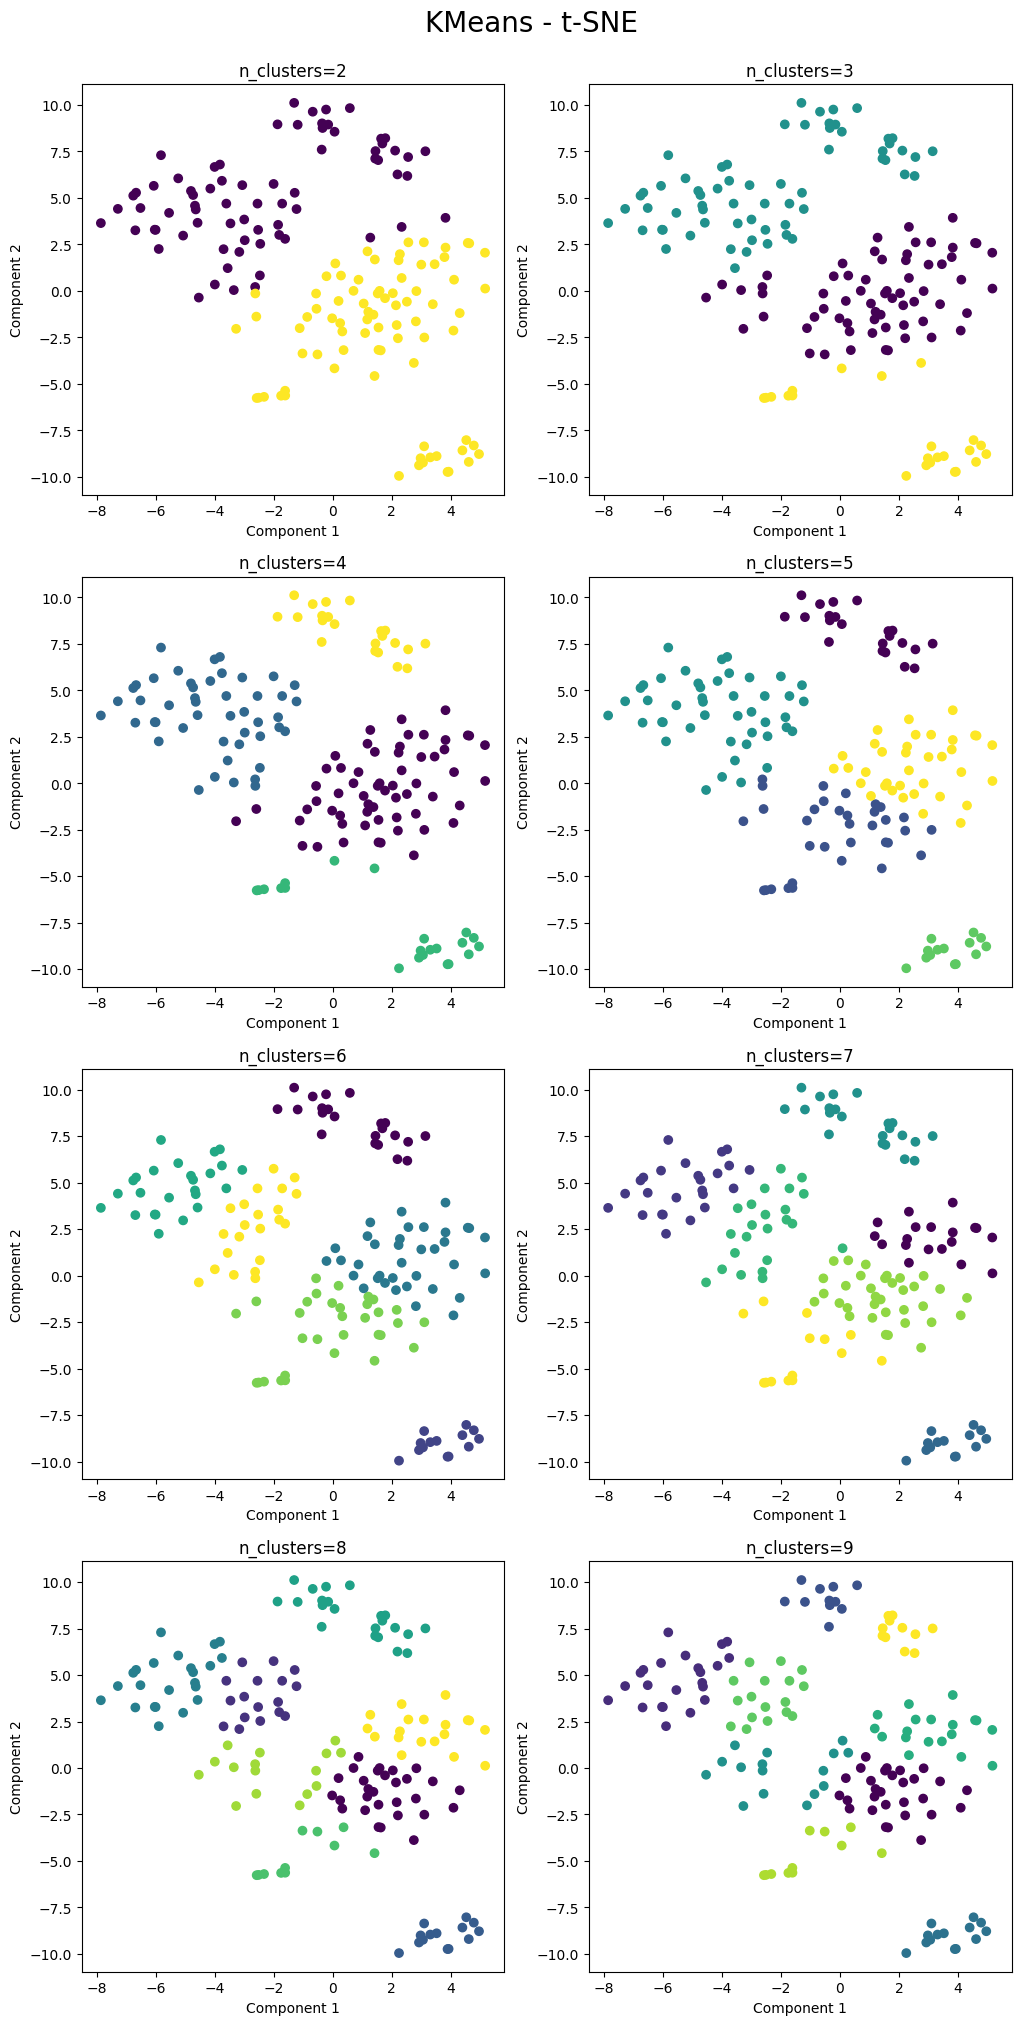

In [75]:
fig, axs = plt.subplots(4, 2, figsize=(12, 25), dpi=100)
plt.suptitle('KMeans - t-SNE', fontsize=20, y=0.91)

kmeans_tsne_info = []

for n_clusters in range(2, 10):
    inertia, silhouette = kmeans(X_tsne, axs[(n_clusters - 2) // 2, (n_clusters - 2) % 2], n_clusters=n_clusters)
    print(f"n_clusters={n_clusters}, inertia={inertia}, silhouette={silhouette}")

    kmeans_tsne_info.append({
        'n_clusters': n_clusters,
        'inertia': inertia,
        'silhouette': silhouette
    })

# Save figure
if not os.path.exists('../../figures/KMeans'):
    os.mkdir('../../figures/KMeans') 

plt.savefig(f'../../figures/KMeans/KMeans - tSNE.png')

plt.show()

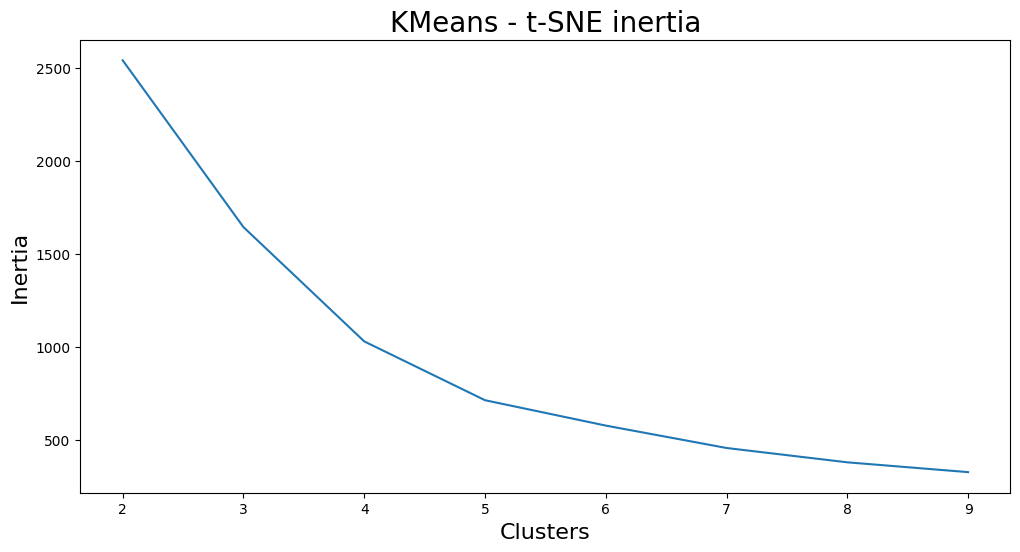

In [76]:
# plot inertia

plt.figure(figsize=(12, 6), dpi=100)
plt.title('KMeans - t-SNE inertia', fontsize=20)
plt.xlabel('Clusters', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.plot([x['n_clusters'] for x in kmeans_tsne_info], [x['inertia'] for x in kmeans_tsne_info])

# Save figure
if not os.path.exists('../../figures/KMeans'):
    os.mkdir('../../figures/KMeans') 

plt.savefig(f'../../figures/KMeans/KMeans - tSNE inertia.png')

plt.show()

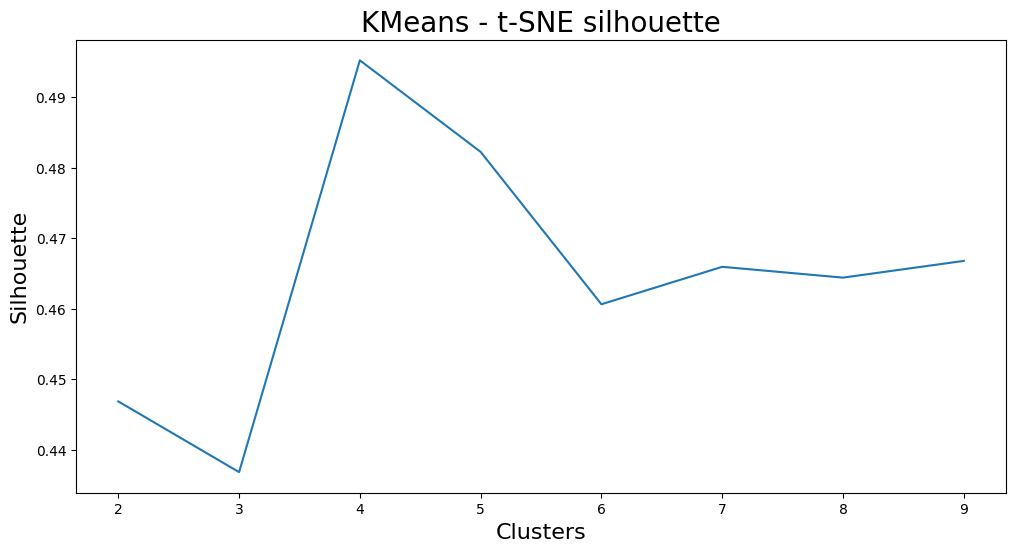

In [77]:
# plot silhouette

plt.figure(figsize=(12, 6), dpi=100)
plt.title('KMeans - t-SNE silhouette', fontsize=20)
plt.xlabel('Clusters', fontsize=16)
plt.ylabel('Silhouette', fontsize=16)
plt.plot([x['n_clusters'] for x in kmeans_tsne_info], [x['silhouette'] for x in kmeans_tsne_info])

# Save figure
if not os.path.exists('../../figures/KMeans'):
    os.mkdir('../../figures/KMeans') 

plt.savefig(f'../../figures/KMeans/KMeans - tSNE silhouette.png')

plt.show()

## 90 PCA component Dataset

In [78]:
def norm_kmeans(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)

    pred = kmeans.predict(X)

    return kmeans.inertia_, silhouette_score(X, pred)

In [79]:
X_pca_90, y_pca_90 = transform_to_PCA(X, y, pca_components=90)

In [80]:
for n_clusters in range(2, 10):
    inertia, silhouette = norm_kmeans(X_pca_90, n_clusters=n_clusters)
    print(f"n_clusters={n_clusters}, inertia={inertia}, silhouette={silhouette}")

n_clusters=2, inertia=6291775.107356552, silhouette=0.2504404478916078
n_clusters=3, inertia=5683041.269790668, silhouette=0.10135234291719405
n_clusters=4, inertia=5327055.358962058, silhouette=0.10573731041550588
n_clusters=5, inertia=5002121.664094287, silhouette=0.11311178661233551
n_clusters=6, inertia=4798516.688077748, silhouette=0.08235594359501125
n_clusters=7, inertia=4693283.602397599, silhouette=0.0878115622164201
n_clusters=8, inertia=4575898.443060204, silhouette=0.07896966254750355
n_clusters=9, inertia=4507217.5056529315, silhouette=0.08521889427769222
